In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
from matplotlib import gridspec
%matplotlib inline

In [ ]:
print(os.getcwd())
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\LDSC')
print(os.getcwd())

In [ ]:
df = pd.read_csv("height_posteriors.txt",sep="\t")

## Heritability Plot

#### Heritability by Sex

In [235]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\LDSC')

In [236]:
df = pd.read_csv("h2_plots.txt", sep="\t")
df = df[df.Phenotype != 'Total Bilirubin']
df = df.sort_values('Correlation', ascending=False).reset_index(drop=True)

In [237]:
x = np.arange(0,len(df.Phenotype.unique()))
df['H2 SE'] = pd.to_numeric(df['H2 SE'])
df.Heritability = pd.to_numeric(df.Heritability)
y1 = df.Heritability.where(df.Sex == 'Both').dropna()
y2 = df.Heritability.where(df.Sex == 'Female').dropna()
y3 = df.Heritability.where(df.Sex == 'Male').dropna()
e1 = df['H2 SE'].where(df.Sex == 'Both').dropna()
e2 = df['H2 SE'].where(df.Sex == 'Female').dropna()
e3 = df['H2 SE'].where(df.Sex == 'Male').dropna()

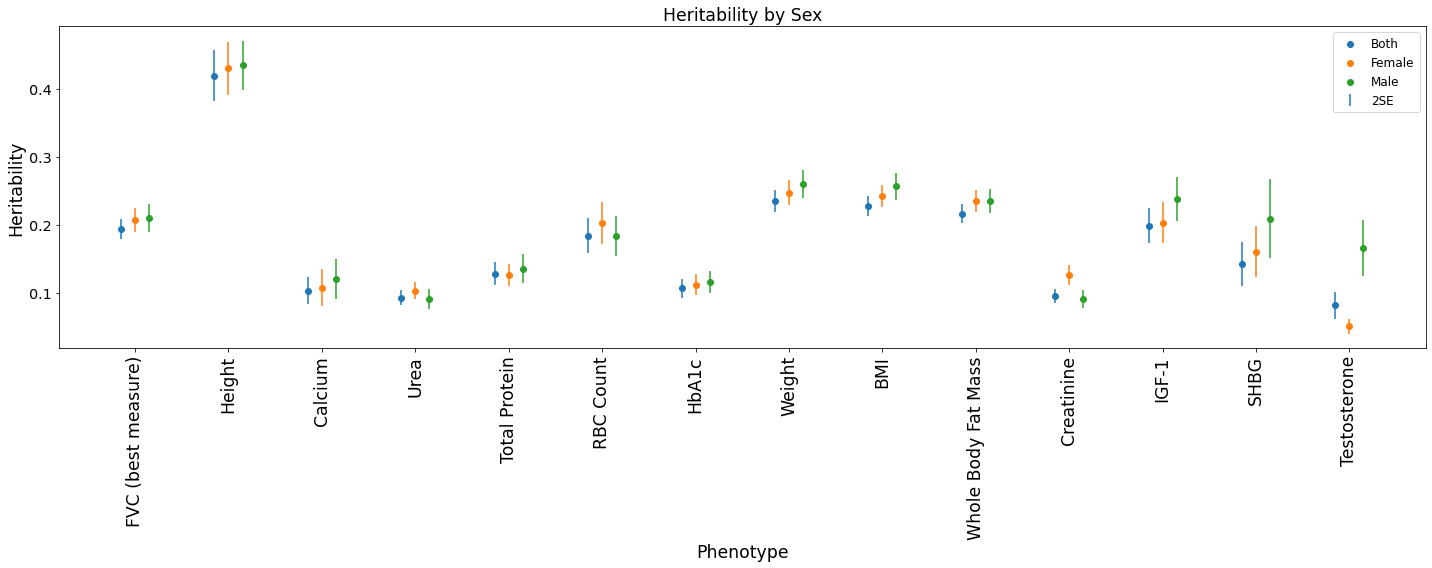

In [243]:
fig = plt.figure(figsize=(20,8))
plt.scatter(x-0.15,y1, label="Both")
plt.scatter(x,y2, label="Female")
plt.scatter(x+0.15,y3, label="Male")
plt.errorbar(x-0.15,y1,yerr=2*e1,linestyle="none",label="2SE")
plt.errorbar(x,y2,yerr=2*e2,linestyle="none")
plt.errorbar(x+0.15,y3,yerr=2*e3,linestyle="none")
plt.xticks(x,df.Phenotype.unique(), rotation = 'vertical', fontsize='xx-large')
plt.yticks(fontsize='x-large')
plt.xlabel("Phenotype", fontsize='xx-large')
plt.ylabel("Heritability", fontsize='xx-large')
plt.legend(fontsize='large')
plt.title("Heritability by Sex", fontsize = 'xx-large')

plt.tight_layout()
plt.savefig("h2_plot_nobili_ordered.png")

#### My and Neale Lab Heritability Comparision

In [ ]:
df_n = pd.read_csv("h2_neale.txt", sep="\t")
df_n.head()
df_n.Neale_h2 = pd.to_numeric(df_n.Neale_h2)
df_n.Neale_SE = pd.to_numeric(df_n.Neale_SE)
y_n = df_n.Neale_h2
e_n = df_n.Neale_SE

In [ ]:
fig = plt.figure(figsize=(20,16))
plt.scatter(x-0.15,y1, label="My LDSC")
plt.scatter(x[0:14],y_n,label="Neale Lab")
plt.xticks(x,df.Phenotype.unique(), rotation = 'vertical', fontsize='x-large')
plt.errorbar(x-0.15,y1,yerr=2*e1,linestyle="none",label="2SE")
plt.errorbar(x[0:14],y_n,yerr=2*e_n,linestyle="none")
plt.yticks(fontsize='x-large')
plt.xlabel("Phenotype", fontsize='x-large')
plt.ylabel("Heritability", fontsize='x-large')
plt.legend(fontsize='large')
plt.title("Neale Lab and My LDSC Heritability Comparision", fontsize = 'xx-large')

#plt.tight_layout()
#plt.savefig("h2_neale.png")

#### Relative Heritability Ordered by Genetic Correlation

In [244]:
df_corr = df.sort_values('Correlation', ascending=False).reset_index(drop=True)
df_corr.head()
relative = []
relative_se = []
for i, row in df_corr.iterrows():
    pheno = row.Phenotype
    both_h2 = df_corr.loc[(df_corr.Phenotype == pheno) & (df_corr.Sex == 'Both'), ['Heritability']].squeeze()
    h2 = row.Heritability / both_h2
    se = ((row.Heritability + row['H2 SE']) / both_h2) - h2
    relative.append(h2)
    relative_se.append(se)
df_corr['Relative'] = relative
df_corr['Relative_SE'] = relative_se

y4 = df_corr.Relative.where(df_corr.Sex == 'Both').dropna()
y5 = df_corr.Relative.where(df_corr.Sex == 'Female').dropna()
y6 = df_corr.Relative.where(df_corr.Sex == 'Male').dropna()
e4 = df_corr['Relative_SE'].where(df_corr.Sex == 'Both').dropna()
e5 = df_corr['Relative_SE'].where(df_corr.Sex == 'Female').dropna()
e6 = df_corr['Relative_SE'].where(df_corr.Sex == 'Male').dropna()

print(df_corr[df_corr.Phenotype == 'Calcium'])
df[df.Phenotype == 'Calcium']

  Phenotype     Sex  Heritability   H2 SE  Correlation  Relative  Relative_SE
6   Calcium    Male        0.1203  0.0150       0.9668  1.166828     0.145490
7   Calcium  Female        0.1074  0.0137       0.9668  1.041707     0.132881
8   Calcium    Both        0.1031  0.0097       0.9668  1.000000     0.094083


,Phenotype,Sex,Heritability,H2 SE,Correlation
6,Calcium,Male,0.1203,0.0150,0.9668
7,Calcium,Female,0.1074,0.0137,0.9668
8,Calcium,Both,0.1031,0.0097,0.9668


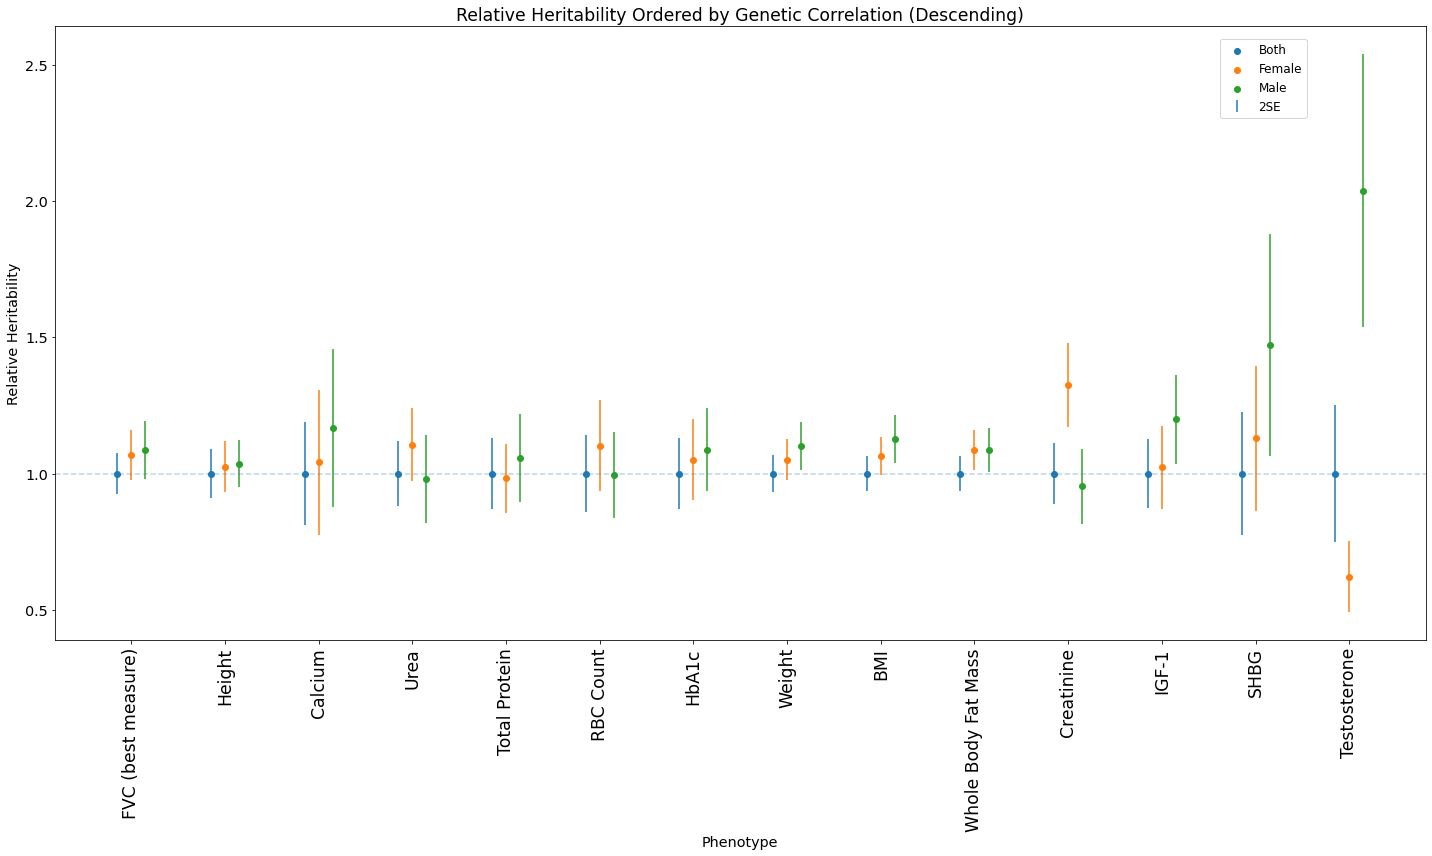

In [247]:
fig = plt.figure(figsize=(20,12))
plt.scatter(x-0.15,y4, label="Both")
plt.scatter(x,y5, label="Female")
plt.scatter(x+0.15,y6, label="Male")
plt.errorbar(x-0.15,y4,yerr=2*e4,linestyle="none",label="2SE")
plt.errorbar(x,y5,yerr=2*e5,linestyle="none")
plt.errorbar(x+0.15,y6,yerr=2*e6,linestyle="none")
plt.xticks(x,df_corr.Phenotype.unique(), rotation = 'vertical', fontsize='xx-large')
plt.yticks(fontsize='x-large')
plt.xlabel("Phenotype", fontsize='x-large')
plt.ylabel("Relative Heritability", fontsize='x-large')
plt.axhline(y=1,linestyle='dashed',alpha=0.3)
plt.legend(fontsize='large', loc=(0.85,0.85))
plt.title("Relative Heritability Ordered by Genetic Correlation (Descending)", fontsize = 'xx-large')

plt.tight_layout()
plt.savefig("relative_h2_nobili.png")

## Mixture Proportion Plot

In [ ]:
pheno = "bmi"

In [ ]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results\\{0}'.format(pheno))
df = pd.read_csv("{0}mixprop.txt".format(pheno),sep="\t")
df.head()
df_ave = df.mean(axis=1)
df_std = df.std(axis=1)

In [ ]:
fig = plt.figure(figsize=(18,8))

x = np.arange(0,len(df.mix_0.unique()))
for i in range(1,10):
    plt.scatter(x,df["mix_{0}".format(i)], color="purple", s=10, alpha = 0.5)
plt.bar(x,df_ave, alpha=1, color="None", edgecolor="royalblue")
plt.errorbar(x,df_ave,yerr=df_std,linestyle="none",label="stdev", color="royalblue",alpha= 0.5,elinewidth=1)

plt.xticks(x, df.mix_0.unique(), rotation = 'vertical', fontsize='xx-large')
plt.yticks(fontsize='x-large')
plt.xlabel('Variance-Covariance Matrice', fontsize='x-large')
plt.ylabel('Proportion', fontsize='x-large')
plt.legend()
plt.title('Mixture Proportions for Different Covariance Matrices - {0}'.format(pheno), fontsize="xx-large")

#plt.tight_layout()
#plt.savefig("{0}mixpropbar.png".format(pheno))

### Heatmap

In [272]:
pheno = "bmi"
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results\\{0}'.format(pheno))
df = pd.read_csv("{0}mixprop_full.txt".format(pheno),sep="\t")
#df_std = df.std(axis=1)
df_ave = df.mean(axis=1)
df = pd.concat([df.mix_0, df_ave], axis=1)
split_df = df["mix_0"].str.split("_", n=2, expand = True)
df['corr'] = split_df[1]
df['effect'] = split_df[0] + split_df[2]
df_heat = df.loc[pd.notnull(df['effect'])]
df_heat = df_heat.pivot(index='corr',columns='effect',values=0)
df_heat = df_heat.reindex(columns=['f1','f3', 'f2', 'f1.5','equal1','m1.5','m2','m3','m1'])
df_heat = df_heat.sort_values('corr', ascending=False)
df_null = df.loc[pd.isnull(df['effect'])]
df_null = pd.DataFrame(list(df_null[0]), index=list(df_null['mix_0']), columns=['Average'])
df_null = df_null.T

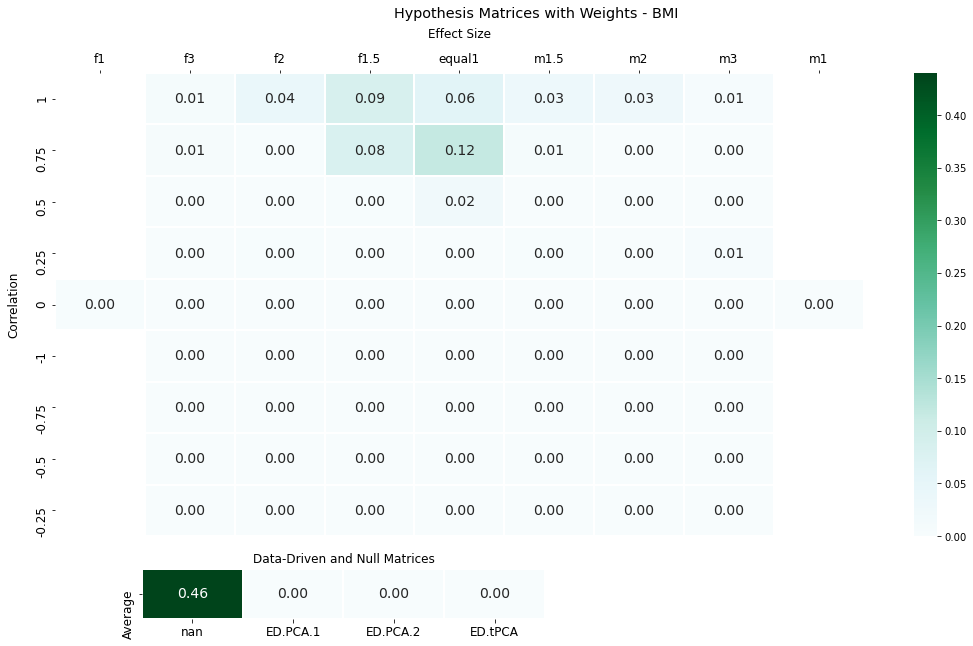

In [274]:
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(8, 12)
ax1 = fig.add_subplot(gs[0:6,:])
ax2 = fig.add_subplot(gs[6:7,1:6])

sns.heatmap(df_heat, cmap='BuGn', annot=True, annot_kws={'size':14}, linewidths=1, ax=ax1, vmax=0.44, fmt='.2f')
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.set_xlabel('Effect Size',fontsize='large', labelpad=15)
ax1.set_ylabel('Correlation', fontsize='large', labelpad=15)
ax1.tick_params(labelsize=12)
ax2.set_title("Data-Driven and Null Matrices")
sns.heatmap(df_null, cmap='BuGn', annot=True, annot_kws={'size':14}, linewidths=1, ax=ax2, cbar=False, fmt='.2f')
plt.tick_params(labelsize=12)
plt.suptitle("Hypothesis Matrices with Weights - {0}".format(pheno.upper()), fontsize='x-large')
plt.tight_layout()
plt.savefig("{0}mixheat_all.png".format(pheno))

In [276]:
df_heat

effect,f1,f3,f2,f1.5,equal1,m1.5,m2,m3,m1
corr,,,,,,,,,
1,NaN,0.010287,0.039896,0.086906,0.062073,0.031314,0.028136,0.006038,NaN
0.75,NaN,0.008342,0.004914,0.081014,0.118227,0.009176,0.000000,0.000779,NaN
0.5,NaN,0.000000,0.000000,0.004975,0.022234,0.000000,0.000000,0.000789,NaN
0.25,NaN,0.000000,0.003005,0.000000,0.000000,0.003616,0.000000,0.006104,NaN
0,0.003535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000153
-1,NaN,0.000353,0.000059,0.000003,0.000990,0.000085,0.000599,0.001706,NaN
-0.75,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
-0.5,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
-0.25,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
